# Training Linear Models

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from pathlib import Path
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import root_mean_squared_error
from math import ceil

### Linear Regression

#### The Normal Equation

In [2]:
np.random.seed(42)

m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

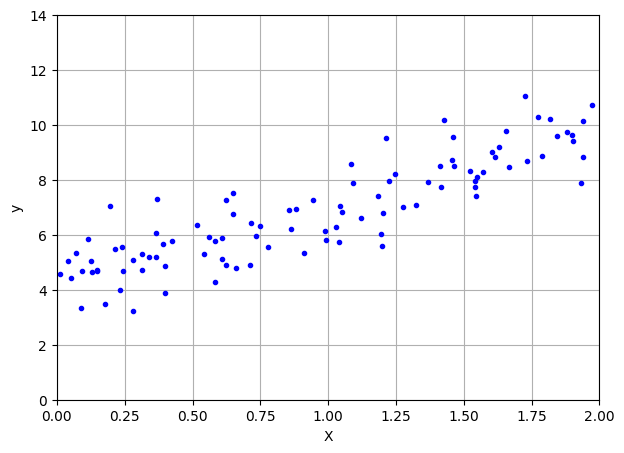

In [3]:
plt.figure(figsize=(7,5))
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 14])
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

In [4]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


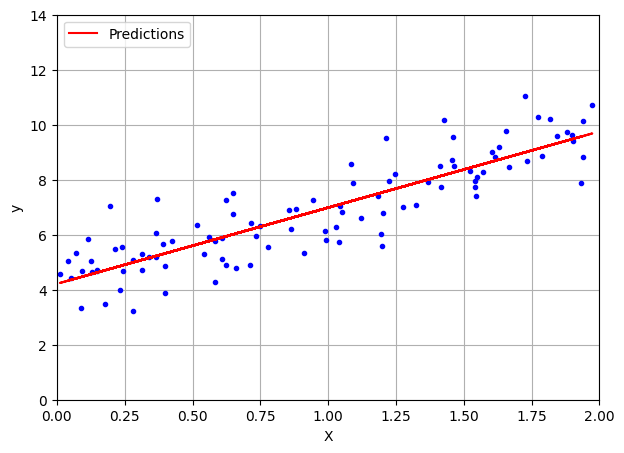

In [6]:
y_pred = X_b @ theta_best

plt.figure(figsize=(7,5))
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-', label = "Predictions")
plt.axis([0, 2, 0, 14])
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [7]:
# Scikit-Learn linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Could also compute the pseudoinverse (Moore-Penrose inverse) directly using np.linalg.pinv().

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

### Gradient Descent

The general idea of gradient descent is to tweak parameters iteratively (searching the models *parameter space*) in order to minimize a cost function.

#### Batch Gradient Descent

*Batch gradient descent* uses the whole batch of training data at every step. In other words, it involves calculations over the full training set X, at each gradient descent step. Gradient descent scales well with the number of features. Thus, training linear regression models with hundreds of thousands of features is much faster using gradient descent than using the Normal equation or SVD decomp.

In [10]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized params

for epoch in range(n_epochs):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

In [13]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

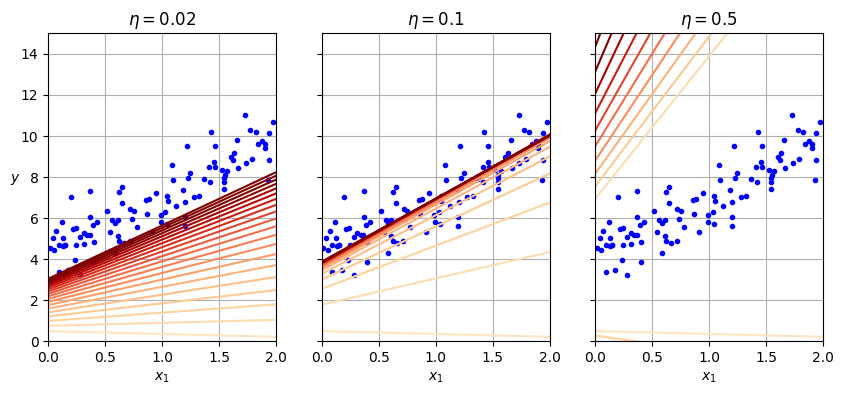

In [14]:

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

### Stochastic Gradient Descent

*Stochastic gradient descent* picks a random instance in the training set at every step and computes the gradients based only on that instance. The irregularity of the cost function using SGD makes it possible to jump out of a local minima - so it has a better chance of finding the global minimum. The *learning schedule* can be set to decrease the learning rate at each iteration, the earlier iterations can jump out of local minima and as the learning rate decreases we can get closer to the global minimum.

In [15]:
theta_path_sgd = [] # stoe the path of theta in the parameter space for plotting

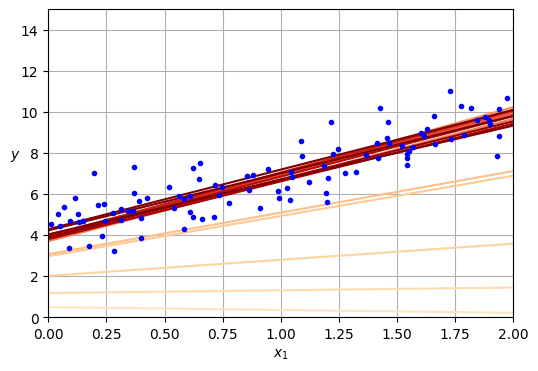

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

n_shown = 20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
    for iteration in range(m):

        # plot
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [18]:
theta

array([[4.21076011],
       [2.74856079]])